# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
##### Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    ##### Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        ##### Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | destin
Processing Record 3 of Set 1 | dapa
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | broome
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | taiohae
City not found. Skipping... 'coord'
Processing Record 11 of Set 1 | enewetak
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | ketchikan
Processing Record 17 of Set 1 | tranovaho
City not found. Skipping... 'coord'
Processing Record 18 of Set 1 | kununurra
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | mil'kovo
Processing Record 21 of Set 1 | jamestown
Pr

Processing Record 36 of Set 4 | marsh harbour
Processing Record 37 of Set 4 | dabakala
Processing Record 38 of Set 4 | turi
Processing Record 39 of Set 4 | dalbandin
Processing Record 40 of Set 4 | fort st. john
Processing Record 41 of Set 4 | rio claro
Processing Record 42 of Set 4 | morden
Processing Record 43 of Set 4 | fuvahmulah
City not found. Skipping... 'coord'
Processing Record 44 of Set 4 | daru
Processing Record 45 of Set 4 | kem'
Processing Record 46 of Set 4 | waspan
Processing Record 47 of Set 4 | bayramaly
Processing Record 48 of Set 4 | kushiro
Processing Record 49 of Set 4 | meulaboh
Processing Record 0 of Set 5 | kharp
Processing Record 1 of Set 5 | codrington
Processing Record 2 of Set 5 | badger
Processing Record 3 of Set 5 | boa vista
Processing Record 4 of Set 5 | alaior
Processing Record 5 of Set 5 | hilo
Processing Record 6 of Set 5 | behat
Processing Record 7 of Set 5 | kangding
Processing Record 8 of Set 5 | isle of lewis
City not found. Skipping... 'coord'
Pr

Processing Record 30 of Set 8 | koungheul
Processing Record 31 of Set 8 | katsuren-haebaru
Processing Record 32 of Set 8 | sidi khaled
Processing Record 33 of Set 8 | antalaha
Processing Record 34 of Set 8 | krasnokamsk
Processing Record 35 of Set 8 | rio de janeiro
Processing Record 36 of Set 8 | ribeira brava
Processing Record 37 of Set 8 | sarmiento
Processing Record 38 of Set 8 | concordia
Processing Record 39 of Set 8 | kataragama
City not found. Skipping... 'coord'
Processing Record 40 of Set 8 | hihifo
City not found. Skipping... 'coord'
Processing Record 41 of Set 8 | tofol
Processing Record 42 of Set 8 | yuksekova
Processing Record 43 of Set 8 | mstsislaw
Processing Record 44 of Set 8 | palora
Processing Record 45 of Set 8 | caiaponia
Processing Record 46 of Set 8 | hami
Processing Record 47 of Set 8 | yeniseysk
Processing Record 48 of Set 8 | pechora
Processing Record 49 of Set 8 | la ronge
Processing Record 0 of Set 9 | tilcara
Processing Record 1 of Set 9 | cabedelo
Process

Processing Record 18 of Set 12 | phalaborwa
Processing Record 19 of Set 12 | kuanda
Processing Record 20 of Set 12 | kabala
Processing Record 21 of Set 12 | port moresby
Processing Record 22 of Set 12 | zliten
Processing Record 23 of Set 12 | rio grande
Processing Record 24 of Set 12 | fonadhoo
City not found. Skipping... 'coord'
Processing Record 25 of Set 12 | harper
Processing Record 26 of Set 12 | liwale
Processing Record 27 of Set 12 | el obeid
Processing Record 28 of Set 12 | bannu
Processing Record 29 of Set 12 | mount carmel
Processing Record 30 of Set 12 | phetchabun
Processing Record 31 of Set 12 | than
Processing Record 32 of Set 12 | paracuru
Processing Record 33 of Set 12 | tekane
City not found. Skipping... 'coord'
Processing Record 34 of Set 12 | laojunmiao
Processing Record 35 of Set 12 | kiffa
Processing Record 36 of Set 12 | nikel
Processing Record 37 of Set 12 | gelibolu
Processing Record 38 of Set 12 | itamaraca
Processing Record 39 of Set 12 | petawawa
Processing R

In [15]:
##### Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0             albany  42.6001  -73.9662      3.65        94         100   
1             destin  30.3935  -86.4958     14.00        83           0   
2               dapa   9.7594  126.0531     28.80        71          30   
3  port-aux-francais -49.3500   70.2167      4.19        79          96   
4       punta arenas -53.1500  -70.9167      2.84        77           4   

   Wind Speed Country        Date  
0        0.89      US  1701069003  
1        5.66      US  1701069032  
2        2.92      PH  1701069032  
3        7.67      TF  1701069033  
4        3.22      CL  1701069033

In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0                   albany  42.6001  -73.9662      3.65        94         100   
1                   destin  30.3935  -86.4958     14.00        83           0   
2                     dapa   9.7594  126.0531     28.80        71          30   
3        port-aux-francais -49.3500   70.2167      4.19        79          96   
4             punta arenas -53.1500  -70.9167      2.84        77           4   

         Wind Speed Country        Date  
City_ID                                  
0              0.89      US  1701069003  
1              5.66      US  1701069032  
2              2.92      PH  1701069032  
3              7.67      TF  1701069033  
4              3.22      CL  1701069033

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

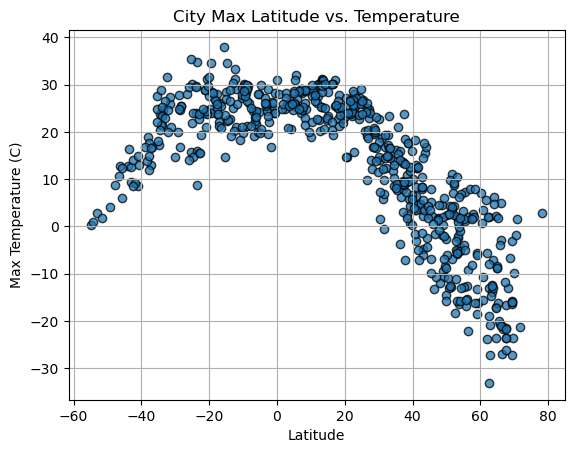

In [19]:
##### Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

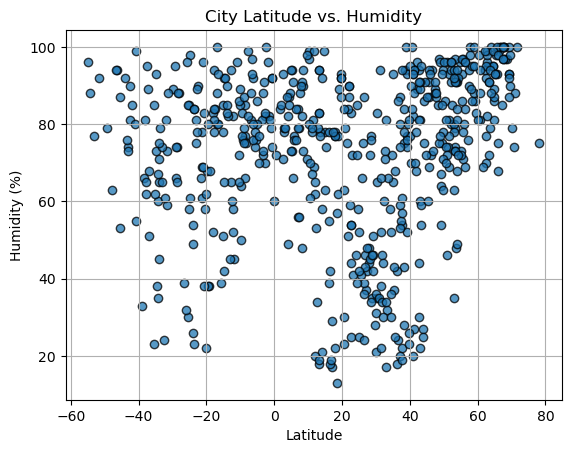

In [21]:
##### Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

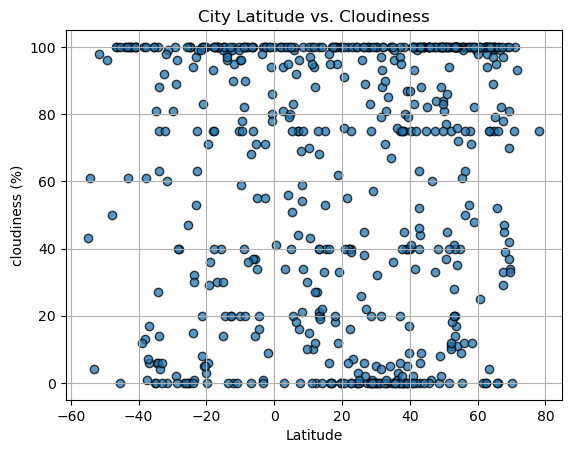

In [22]:
##### Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

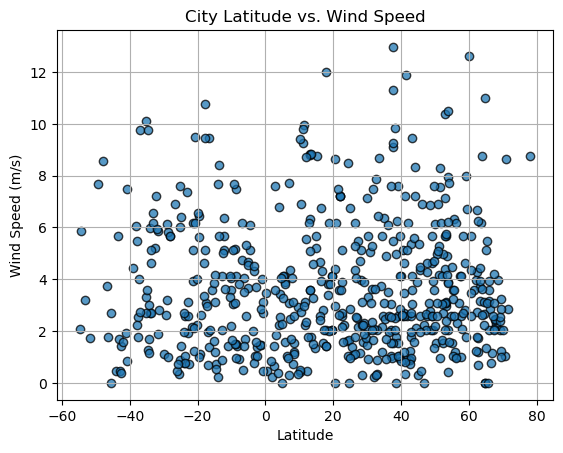

In [23]:
##### Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
##### Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

In [72]:
##### Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                
0          albany  42.6001  -73.9662      3.65        94         100   
1          destin  30.3935  -86.4958     14.00        83           0   
2            dapa   9.7594  126.0531     28.80        71          30   
5          broome  42.2506  -75.8330      4.82        89          99   
7        hamilton  39.1834  -84.5333      0.69        77          87   

         Wind Speed Country        Date  
City_ID                                  
0              0.89      US  1701069003  
1              5.66      US  1701069032  
2              2.92      PH  1701069032  
5              0.89      US  1701069033  
7              7.60      US  1701068438

In [73]:
##### Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
3        port-aux-francais -49.3500   70.2167      4.19        79          96   
4             punta arenas -53.1500  -70.9167      2.84        77           4   
6             invercargill -46.4000  168.3500     12.79        94         100   
8                  ushuaia -54.8000  -68.3000      0.29        96          43   
10          puerto natales -51.7236  -72.4875      1.80        92          98   

         Wind Speed Country        Date  
City_ID                                  
3              7.67      TF  1701069033  
4              3.22      CL  1701069033  
6              1.79      NZ  1701069016  
8              2.09      AR  1701069034  
10             1.73      CL  1701069035

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7811690280787671


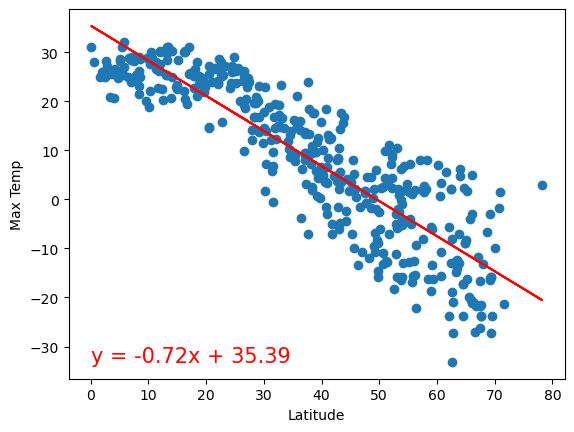

In [82]:
##### Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.min(), y_values.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.3700072182827416


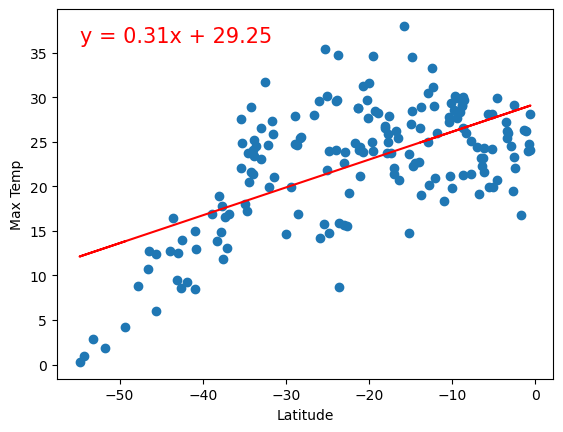

In [94]:
##### Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.min(), y_values.max()), ha='left', va='top',fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a strong positive linear relationshio between the variables in the Northern Hemisphere (r-value is 0.781169). For the Southern Hemisphere, there is also a positive linear relationship (r-value is 0.370007) but not as strong as the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11579006656426295


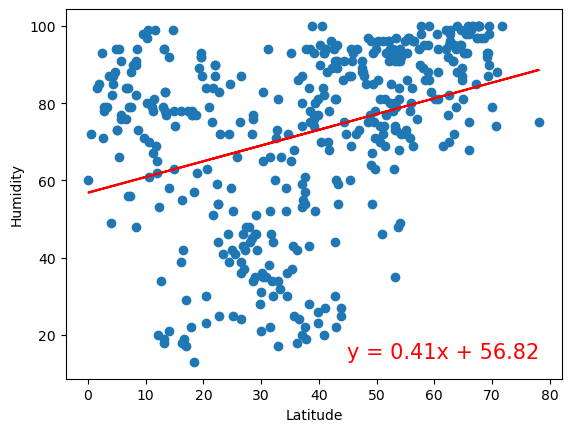

In [95]:
##### Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.max(), y_values.min()), ha='right', va='bottom', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.015691378365025543


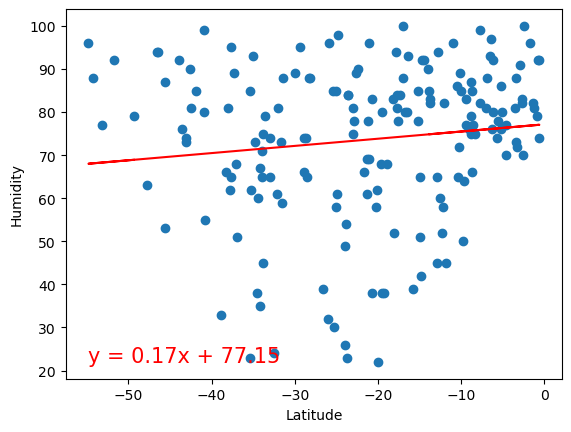

In [102]:
##### Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.min(), y_values.min()), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Looks like there is a very weak positive linear relationship. Both r-values are close to 0 (Northern Hemisphere = 0.115790, Southern Hemisphere = 0.015691). These results suggest that there is little to no linear correlation between the variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02754280139147128


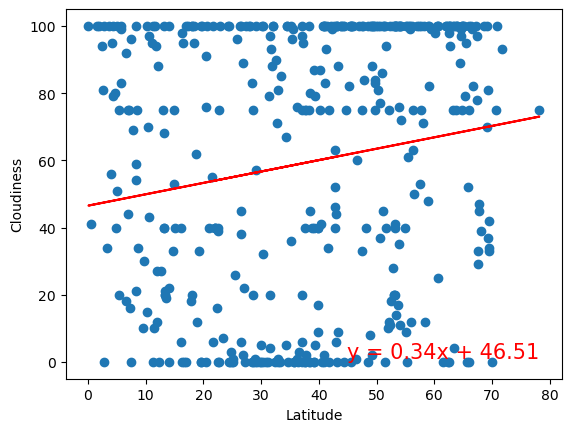

In [104]:
##### Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.max(), y_values.min()), ha='right', va='bottom', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.004418851050219524


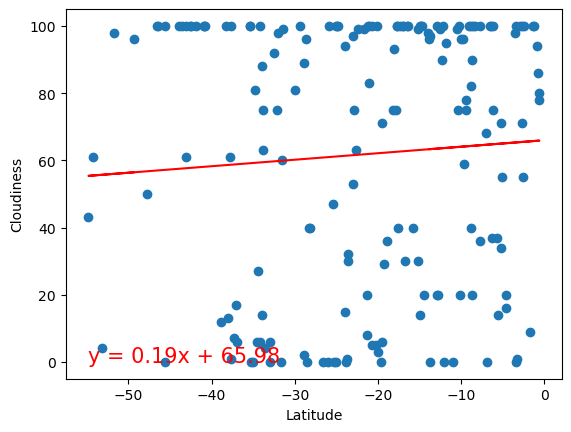

In [111]:
##### Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.min(), y_values.min()), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** For Northern and Southern Hemispheres, there is a very weak positive linear relationship as the r-values are close to 0 (Northern Hemisphere = 0.027542, Southern Hemisphere = 0.004418). There is little to no linear correlation between the variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00023773625254403438


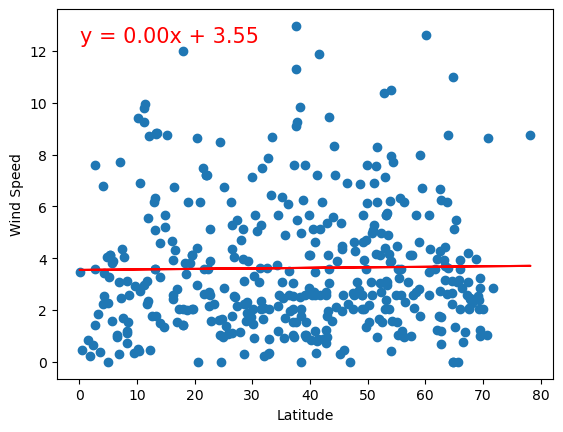

In [117]:
##### Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.min(), y_values.max()), ha='left', va='top', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.005114757728039025


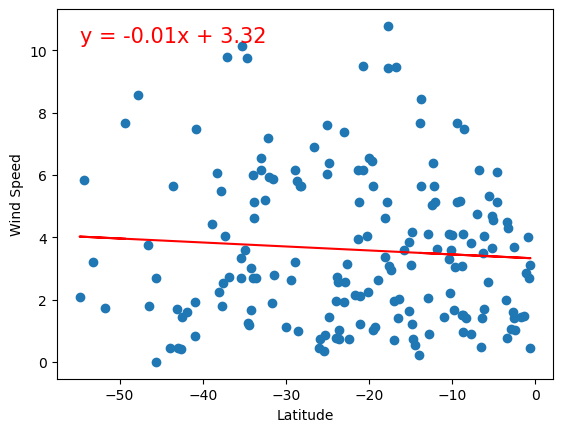

In [118]:
##### Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Drop values that are not a number
x = x_values.dropna()
y = y_values.dropna()

# Create the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq,(x_values.min(), y_values.max()), ha='left', va='top', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** For the wind speed, looks like there is no linear relationship since the values are extremely close to 0 (r-value for Northern Hemisphere is 0.000237, and for the Southern Hemisphere it is 0.005114).